In [124]:
library(Seurat)
library(tidyverse)
library(SeuratWrappers)
library(future)
library(ggplot2)
library(SeuratObject)
library(viridis)
library(purrr)
library(scales)
library(presto)
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)
library(purrr)
library(tidyr)
library(pheatmap)

In [94]:
# obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/scrna_integrated_harmony_final.rds')
obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/harmony_cleaned_annotated_v2.rds')
obj

An object of class Seurat 
74637 features across 352654 samples within 2 assays 
Active assay: SCT (36031 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [31]:
obj$general_cell_type |> unique()

[1] "NPC_like"               "Mesenchymal_like"       "OPC_like"              
 [4] "Stromal/Endothelial"    "Astrocyte_like"         "TILs"                  
 [7] "Myeloid"                "Mature_Oligodendrocyte" "CTAs"                  
[10] "CAF/Pericyte"           "B_cell"                 "Lung_Metas"            
[13] "Melanoma_Metas"

In [32]:
obj@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,5,33,36,31,31,31,51,49,49,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,10,6,20,18,21,19,18,32,32,Mesenchymal_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,5,37,19,21,20,32,35,58,58,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,PRJNA1125010,2965,1417,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,8.5666105,singlet,⋯,23,34,35,37,39,39,41,42,42,Stromal/Endothelial


In [95]:
target_types <- c("Astrocyte_like", "OPC_like", "Mesenchymal_like", "NPC_like")

obj_tumor <- subset(obj, subset = general_cell_type %in% target_types)

DefaultAssay(obj_tumor) <- "RNA"  # as before
all_genes <- rownames(obj_tumor)

In [66]:
obj_tumor@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,5,33,36,31,31,31,51,49,49,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,10,6,20,18,21,19,18,32,32,Mesenchymal_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,5,37,19,21,20,32,35,58,58,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGGATAGTACTGGG-1,PRJNA1125010,7268,2835,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.0044029,singlet,⋯,1,9,37,7,38,1,40,20,20,Astrocyte_like


In [ ]:
# Moduel Score
DefaultAssay(obj)
head(colnames(obj@meta.data))
table(obj$seurat_clusters)  # or another cluster column if you use it

[1] "SCT"

[1] "orig.ident"     "nCount_RNA"     "nFeature_RNA"   "project_id"    
[5] "orig_sample_id" "sample_uid"


    0     1     2     3     4     5     6     7     8     9    10    11    12 
17413 15620 15554 13896 13701 12322 11727 11553 11407 11294 10715  9535  9481 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 9029  8640  8445  8245  7536  7358  7020  6530  6513  6206  6165  5484  5465 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
 5240  4625  4606  4456  4314     4  4204  3953  3825  3703  3615  3362  3113 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
 3095  2805  2680  2444  2444  2440  2333  2351  2220  2037  2004  1993  1981 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
 1750  1651  1641  1609  1342     5  1205  1132  1053   996   637   583   539 
   65    66    67    68    69    70    71    72    73    74 
  373   269   234   223   212   157   106    95    82    59 

In [ ]:
DefaultAssay(obj) <- "RNA"

In [83]:
# ========= NPC-like =========
npc_genes_raw <- c("DLL3", "DLL1", "SOX4", "TUBB3", "HES6", "TAGLN3", "NEU4", "MARCKSL1", "CD24", "STMN1", "TCF12", 
"BEX1", "MAP2", "PTPRS", "MLLT11", "NPPA", "MEST", "ASCL1", "BTG2", "NXPH1", "HN1", "PFN2", 
"SCG3", "MYT1", "CHD7", "GPR56", "TUBA1A", "PCBP4", "BTV1", "SHD", "AMOTL2", "DBN1", "HIP1", "ABAT", "ELAVL4", 
"GRIK2", "TSPAN13", "ELMO1", "GLCCI1", "SEZ6L", "LRRN1", "SEZ6", "SOX11", "STMN2", "RND3", "HMP19", 
"MIAT", "DCX", "NSG1", "DLX6-AS1", "NREP", "FNBp1L", "STMN4", "DLX5", "MAP1B", "RBFOX2", "IGFBPL1", "TMEM161B-AS1", "DPYSL3", 
"SEPT3", "PKIA", "ATP1B1", "DYNC1I1", "CD200", "SNAP25", "PAK3", "NDRG4", "KIF5A", "UCHL1", "KIF5C", "DDAH2", "TUBB2A", 
"LBH", "LOC150568", "TCF4", "GNG3", "NFIB", "DPYSL5", "CRABP1", "NFIX", "CEF170", "BLCAP")

# ========= OPC-like =========
opc_genes_raw <- c("BCAN", "PLP1", "GPR17", "FIBIN", "LHFPL3", "OLIG1", "PSAT1", "SCRG1", "OMG", "APOD", "SIRT2", 
"TNR", "THY1", "PHYHIPL", "SOX2-OT", "NKAIN4", "LPPR1", "PTPRZ1", "VCAN", "CNP", "TNS3", "LIMA1", "CA10", 
"PCDHGC3", "CNTN1", "SCD5", "P2RX7", "CADM2", "FGF12", "TMEM206", "TNEU4", "FXYD6", "RNF13", "RTKN", "GPM6B", "LMF1", 
"ALCAM", "PGRMC1", "HRASLS", "BCAS1", "RAB31", "PLLP", "FABP5", "NLGN3", "SERINC5", "EFNB4L2", "GPR37L1")

# ========= AC-like (astrocyte-like) =========
ac_genes_raw <- c("CST3", "S100B", "SLC1A3", "HEPN1", "HOPX", "MT3", "SPARCL1", "MLC1", "GFAP", "FABP7", 
"PON2", "METTL7B", "SPARC", "GATM", "RAMP1", "PMP2", "AQP4", "DBI", "EDNRB", "CLU", 
"PMP22", "ATP1A2", "HEY1", "TTYH1", "NDRG2", "PRCP", "ATP1B2", "AGT", "PLTP", "F3", 
"PPAP2B", "ANXA5", "TSPAN7", "PEG10", "RFX4", "SLC4A4", "TENM1")

# ========= MES-like =========
mes_genes_raw <- c("CHI3L1", "VEGFA", "ANXA2", "ANXA1", "CD44", "MT2A", "C1S", "EFEMP1", 
"C1R", "SOD2", "IFITM3", "TIMP1", "SPP1", "A2M", "S100A11", "MT1X", "S100A10", "FN1", 
"LGALS1", "S100A16", "CLIC1", "MGST1", "RCAN1", "TAGLN2", "NPC2", "SERPING1", "C8orf4", 
"EMP1", "APOE", "CTSB", "C3", "LGALS3", "MT1E", "EMP3", "SERPINA3", "ACTN1", "PRDX6", 
"IGFBP7", "SERPINE1", "PLP2", "MGP", "CLIC4", "GFPT2", "GSN", "NNMT", "TUBA1C", "GJA1", 
"TNFRSF1A", "WWTR1", "HILPDA", "ADM", "DDIT3", "NDRG1", "HERPUD1", "DNAJB9", "TRIB3", 
"ENO2", "AKAP12", "SQSTM1", "ATF3", "NAMPT", "NRN1", "SLC2A1", "BNIP3", "INSIG2", "IGFBP3", 
"PPP1R15A", "VIM", "PLOD2", "GBE1", "SLC2A3", "FTL", "WARS", "ERO1L", "XPO1", "HSPA5", "GDF15", 
"EPAS1", "LDHA", "P4HA1", "SERTAD1", "PFKP", "PGK1", "EGLN3", "SLC6A6", "CA9", "BNIP3L", "RPL21", 
"TRAM1", "UFM1", "ASNS", "GOLT1B", "ANGPTL4", "SLC39A14", "CDKN1A", "HSPA9")

In [84]:
all_genes <- rownames(obj)

# filter_genes <- function(g) {
#   present <- intersect(g, all_genes)
#   missing <- setdiff(g, present)
#   list(present = present, missing = missing)
# }

filter_genes <- function(g) {
  present <- intersect(g, all_genes)
  missing <- setdiff(g, all_genes)  # <- fix
  list(present = present, missing = missing)
}

npc_genes <- filter_genes(npc_genes_raw)
# npc_genes_2 <- filter_genes(npc_genes_raw_2)
opc_genes <- filter_genes(opc_genes_raw)
ac_genes  <- filter_genes(ac_genes_raw)
mes_genes <- filter_genes(mes_genes_raw)
# mes_genes_2 <- filter_genes(mes_genes_raw_2)

cat("NPC-like: ", length(npc_genes$present), "present, ", length(npc_genes$missing), "missing\n")
# cat("NPC-like: ", length(npc_genes_2$present), "present, ", length(npc_genes_2$missing), "missing\n")
cat("OPC-like: ", length(opc_genes$present), "present, ", length(opc_genes$missing), "missing\n")
cat("AC-like : ", length(ac_genes$present),  "present, ", length(ac_genes$missing),  "missing\n")
cat("MES-like: ", length(mes_genes$present), "present, ", length(mes_genes$missing), "missing\n")
# cat("MES-like: ", length(mes_genes_2$present), "present, ", length(mes_genes_2$missing), "missing\n")

npc_genes$missing  # inspect which Neftel markers are absent if curious


NPC-like:  73 present,  9 missing
OPC-like:  42 present,  5 missing
AC-like :  36 present,  1 missing
MES-like:  93 present,  3 missing


[1] "HN1"          "GPR56"        "BTV1"         "HMP19"        "FNBp1L"      
[6] "TMEM161B-AS1" "SEPT3"        "LOC150568"    "CEF170"

In [85]:
# NPC-like 1
obj <- AddModuleScore(
  obj,
  features = list(npc_genes$present),
  name = "NPC_like"
)

# # NPC-like 2
# obj <- AddModuleScore(
#   obj,
#   features = list(npc_genes_2$present),
#   name = "NPC_like_2"
# )

# This creates a column "NPC_like1" in obj@meta.data

# OPC-like
obj <- AddModuleScore(
  obj,
  features = list(opc_genes$present),
  name = "OPC_like"
)

# AC-like
obj <- AddModuleScore(
  obj,
  features = list(ac_genes$present),
  name = "AC_like"
)

# MES-like 1
obj <- AddModuleScore(
  obj,
  features = list(mes_genes$present),
  name = "MES_like"
)

# # MES-like 2
# obj <- AddModuleScore(
#   obj,
#   features = list(mes_genes_2$present),
#   name = "MES_like_2"
# )

# Check new columns
head(obj@meta.data[, grepl("NPC_like|OPC_like|AC_like|MES_like", colnames(obj@meta.data))])

,NPC_like1,OPC_like1,AC_like1,MES_like1
,<dbl>,<dbl>,<dbl>,<dbl>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,0.025802310,-0.01801862,-0.01744715,0.01285767
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,0.038527056,-0.01029219,0.26569703,0.07250753
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,0.236243493,0.39851360,-0.10063993,-0.09242274
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,0.080521378,0.11320606,-0.01142581,-0.06468032
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,0.138925319,0.35896940,-0.11964377,-0.11755746
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,-0.006228204,0.06308015,0.12122973,0.17019827


In [86]:
obj$NPC <- obj$NPC_like1
# obj$NPC2 <- obj$NPC_like_21
obj$OPC <- obj$OPC_like1
obj$AC  <- obj$AC_like1
obj$MES <- obj$MES_like1
# obj$MES2 <- obj$MES_like_21

In [87]:
cluster_col <- "general_cell_type"

cluster_scores <- obj@meta.data %>%
  dplyr::select(all_of(cluster_col), NPC, OPC, AC, MES) %>%
  group_by(.data[[cluster_col]]) %>%
  summarise(
    NPC_mean = mean(NPC, na.rm = TRUE),
    # NPC2_mean = mean(NPC2, na.rm = TRUE),
    OPC_mean = mean(OPC, na.rm = TRUE),
    AC_mean  = mean(AC,  na.rm = TRUE),
    MES_mean = mean(MES, na.rm = TRUE),
    # MES2_mean = mean(MES2, na.rm = TRUE)
  ) %>%
  ungroup()

cluster_scores

general_cell_type,NPC_mean,OPC_mean,AC_mean,MES_mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Astrocyte_like,0.037669147,0.07090478,0.128877431,0.068771962
B_cell,-0.034063589,-0.09328253,-0.095043838,-0.011010161
CAF/Pericyte,0.014562322,0.01045638,0.090520892,0.182610374
CTAs,-0.050396093,-0.09565670,-0.094734285,0.110437819
Lung_Metas,0.020363954,-0.04645867,-0.054719056,0.054520356
Mature_Oligodendrocyte,0.063663894,0.23635880,0.019218026,-0.007778062
Melanoma_Metas,0.001191771,-0.01748696,-0.001429909,0.138461418
Mesenchymal_like,0.025348570,0.03712913,0.214068942,0.213631434
Myeloid,-0.037526942,-0.05741073,-0.025984357,0.142241956


In [88]:
cluster_long <- cluster_scores %>%
  pivot_longer(cols = c(NPC_mean, OPC_mean, AC_mean, MES_mean),
               names_to = "state", values_to = "mean_score") %>%
  mutate(state = gsub("_mean","", state))

cluster_state_assignment <- cluster_long %>%
  group_by(.data[[cluster_col]]) %>%
  slice_max(mean_score, n = 1, with_ties = FALSE) %>%
  ungroup() %>%
  dplyr::rename(cluster = !!cluster_col,
                dominant_state = state)

cluster_state_assignment

cluster,dominant_state,mean_score
<chr>,<chr>,<dbl>
Astrocyte_like,AC,0.128877431
B_cell,MES,-0.011010161
CAF/Pericyte,MES,0.182610374
CTAs,MES,0.110437819
Lung_Metas,MES,0.054520356
Mature_Oligodendrocyte,OPC,0.236358801
Melanoma_Metas,MES,0.138461418
Mesenchymal_like,AC,0.214068942
Myeloid,MES,0.142241956


# Tumor

In [96]:
# (redefine filter_genes using all_genes from obj_tumor)
filter_genes <- function(g) {
  present <- intersect(g, all_genes)
  missing <- setdiff(g, all_genes)
  list(present = present, missing = missing)
}

# rebuild npc/opc/ac/mes lists on obj_tumor
npc_genes <- filter_genes(npc_genes_raw)
# npc_genes_2 <- filter_genes(npc_genes_raw_2)
opc_genes   <- filter_genes(opc_genes_raw)
ac_genes    <- filter_genes(ac_genes_raw)
mes_genes <- filter_genes(mes_genes_raw)
# mes_genes_2 <- filter_genes(mes_genes_raw_2)

# run AddModuleScore on obj_tumor (same as your script but on the subset)
obj_tumor <- AddModuleScore(obj_tumor, features = list(npc_genes$present), name = "NPC_like")
# obj_tumor <- AddModuleScore(obj_tumor, features = list(npc_genes_2$present), name = "NPC_like_2")
obj_tumor <- AddModuleScore(obj_tumor, features = list(opc_genes$present),    name = "OPC_like")
obj_tumor <- AddModuleScore(obj_tumor, features = list(ac_genes$present),     name = "AC_like")
obj_tumor <- AddModuleScore(obj_tumor, features = list(mes_genes$present),  name = "MES_like")
# obj_tumor <- AddModuleScore(obj_tumor, features = list(mes_genes_2$present),  name = "MES_like_2")
# obj_tumor$NPC <- obj_tumor$NPC_like1
# # obj_tumor$NPC2 <- obj_tumor$NPC_like_21
# obj_tumor$OPC  <- obj_tumor$OPC_like1
# obj_tumor$AC   <- obj_tumor$AC_like1
# obj_tumor$MES <- obj_tumor$MES_like1
# obj_tumor$MES2 <- obj_tumor$MES_like_21

In [69]:
obj_tumor@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type,NPC_like1,OPC_like1,AC_like1,MES_like1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,31,31,51,49,49,NPC_like,-0.02032286,0.04473203,0.090945010,0.17783472
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,21,19,18,32,32,Mesenchymal_like,0.09339904,0.27139221,0.512964715,0.26040566
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,3,0,25,18,18,OPC_like,0.34050413,0.54184907,-0.165937162,-0.03219174
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,20,32,35,58,58,NPC_like,-0.01384528,0.12515256,0.005987721,0.05258818
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,3,0,25,18,18,OPC_like,0.18464963,0.38942942,-0.153374118,-0.11304749
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGGATAGTACTGGG-1,PRJNA1125010,7268,2835,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.0044029,singlet,⋯,38,1,40,20,20,Astrocyte_like,-0.03542095,0.04678931,-0.111699876,0.06302794


In [97]:
# 1. find the score columns ending in '1'
score_cols <- grep("_like1$", colnames(obj_tumor@meta.data), value = TRUE)
score_cols

[1] "NPC_like1" "OPC_like1" "AC_like1"  "MES_like1"

In [98]:
# 2. create new names by removing the final '1'
new_names  <- sub("1$", "", score_cols)
new_names

[1] "NPC_like" "OPC_like" "AC_like"  "MES_like"

In [99]:
# 3. assign them back
idx <- match(score_cols, colnames(obj_tumor@meta.data))
colnames(obj_tumor@meta.data)[idx] <- new_names

In [100]:
cluster_col <- "general_cell_type"

cluster_scores <- obj_tumor@meta.data %>%
  dplyr::select(all_of(cluster_col), NPC_like, OPC_like, AC_like, MES_like) %>%
  group_by(.data[[cluster_col]]) %>%
  summarise(
    NPC_mean = mean(NPC_like, na.rm = TRUE),
    # NPC2_mean = mean(NPC2, na.rm = TRUE),
    OPC_mean  = mean(OPC_like,  na.rm = TRUE),
    AC_mean   = mean(AC_like,   na.rm = TRUE),
    MES_mean = mean(MES_like, na.rm = TRUE)
    # MES2_mean = mean(MES2, na.rm = TRUE)
  ) %>%
  ungroup()

cluster_scores

general_cell_type,NPC_mean,OPC_mean,AC_mean,MES_mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Astrocyte_like,0.04371805,0.13220823,0.18138248,0.168949595
Mesenchymal_like,-0.01526624,-0.00167345,0.29155465,0.389660320
NPC_like,0.11984352,0.03460836,0.03002729,0.068847284
OPC_like,0.18093983,0.31107657,-0.04090973,0.001564285


In [101]:
obj_tumor@meta.data$general_cell_type |> unique()

[1] "NPC_like"         "Mesenchymal_like" "OPC_like"         "Astrocyte_like"

In [102]:
majorDot <- function(seu.obj = NULL, groupBy = "",
                     yAxis = NULL, scale = T,
                     features = "", split.by = NULL, cols = c("lightgrey", "blue"), cluster.idents = F
                    ){
    
    t <- try(head(seu.obj@assays$SCT$data),silent = T)

    # if("try-error" %in% class(t)){
    #     seu.obj <- ScaleData(seu.obj)
    # }
                       
    p <- DotPlot(seu.obj,
                 assay = "SCT",
                 features = features,
                 group.by = groupBy,
                 cols = cols,
                 scale = scale,
                 split.by = split.by#,
                 #idents = levels(seu.obj@meta.data[[groupBy]]),
                 #cluster.idents = cluster.idents
                ) +
      geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.5) +
      labs(size='Percent\nexpression')  +
      theme(axis.line = element_blank(),
            axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
            legend.position = "top",
            legend.direction = "horizontal",
            legend.justification='center',
            panel.background = element_rect(fill = "white",colour = NA),
            plot.background = element_rect(fill = "white",colour = NA),
            legend.key.size = unit(1, "line"),
            panel.border = element_rect(color = "black",
                                        fill = NA,
                                        size = 1),
            ) +
      scale_colour_viridis(option="magma", name='Average\nexpression') +
      guides(size=guide_legend(override.aes = list(shape=21, colour="black", fill="white"),
                               label.position = "bottom")) +
      scale_size(range = c(0.5, 8), limits = c(0, 100)) +
      #annotate("rect", xmin = features_cnt$startVal, xmax = features_cnt$endVal, ymin = features_cnt$cluster-0.5, ymax = features_cnt$cluster+0.5, fill = NA, colour = "mediumpurple1", size = 1) +
      {if(!is.null(yAxis)){scale_y_discrete(limits=rev(yAxis))}} +
      guides(color = guide_colorbar(title = 'Scaled\nExpression')) 
      
    
    return(p)
}

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


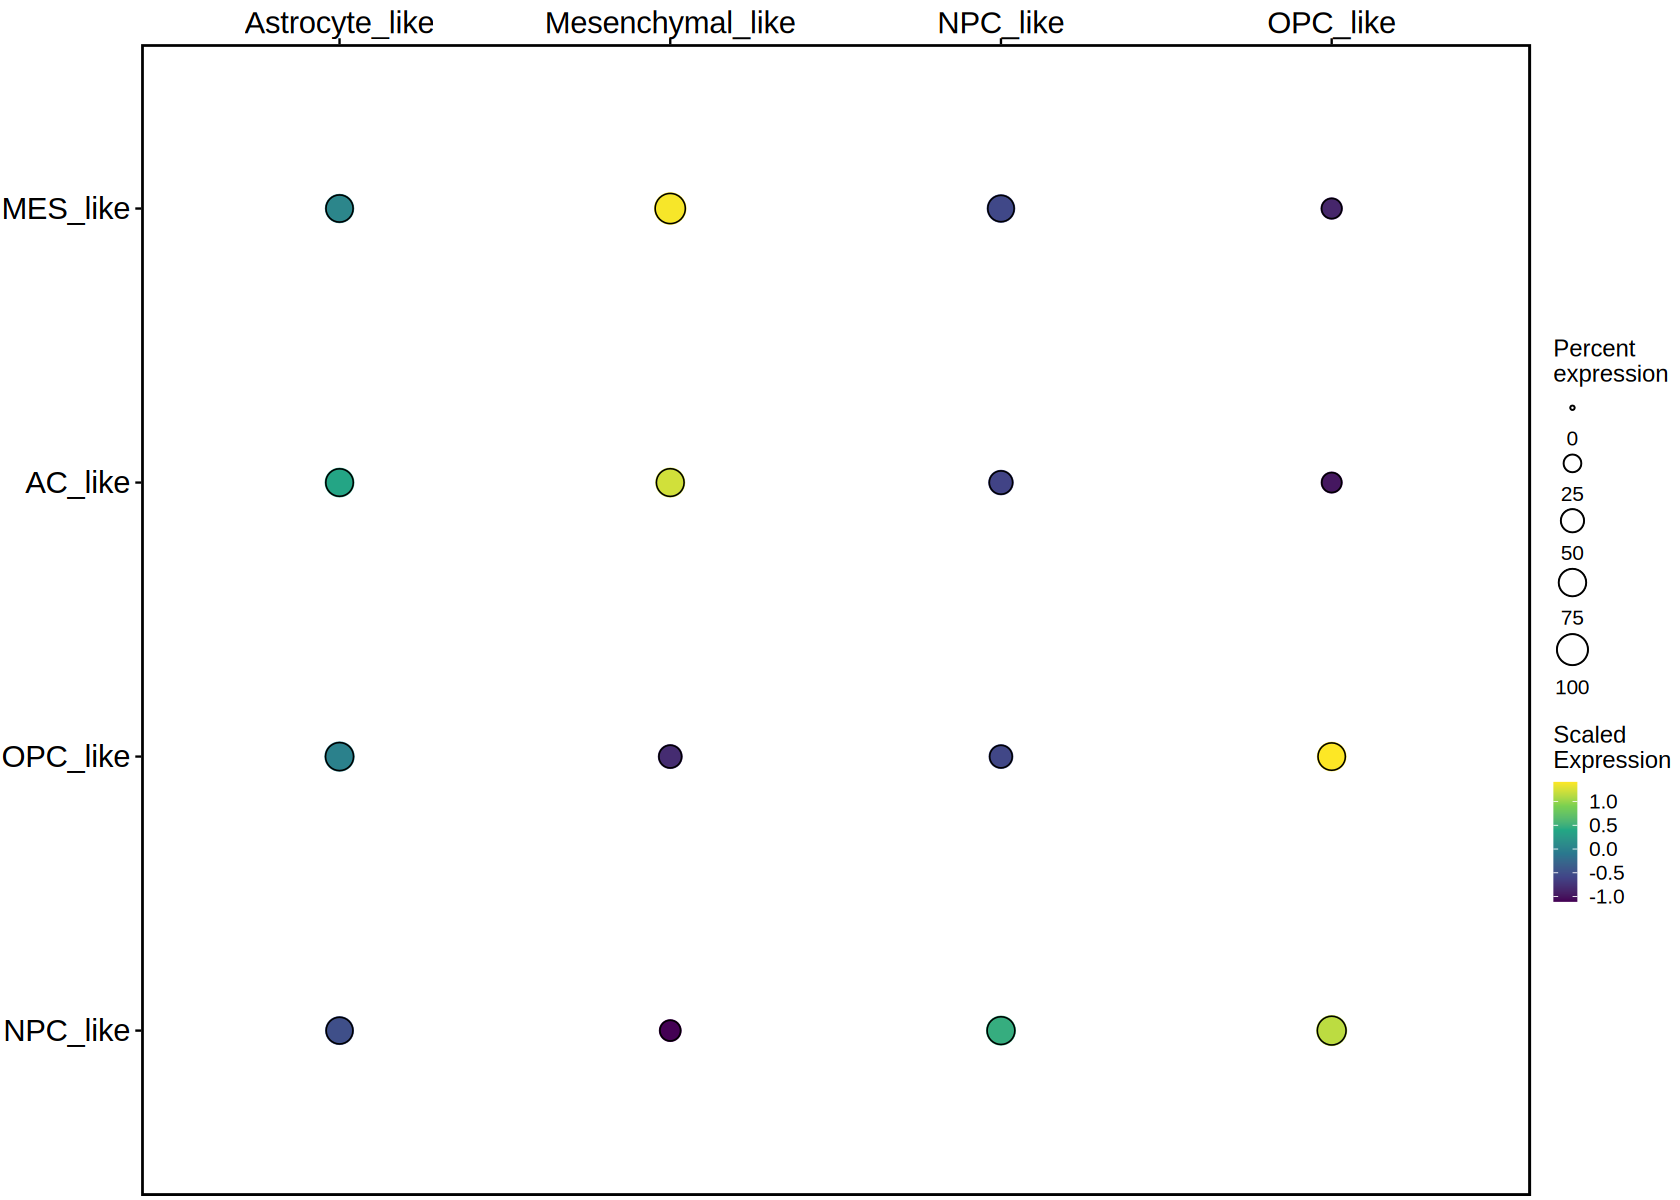

In [123]:
options(repr.plot.width = 14, repr.plot.height = 10)
ecScores <- majorDot(
  seu.obj   = obj_tumor,
  groupBy   = "general_cell_type",         # or any meta.data column
  features  = new_names,                 # your seven *_score columns
  scale     = TRUE,
  split.by  = NULL
) + coord_flip() + theme(plot.margin = margin(3, 0, 3, 0, "pt"),
                                             axis.text.y=element_text(size=18),
                                                                   axis.title = element_blank(),
                                                                   legend.position = "right",
                                                                   legend.direction = "vertical",
                                                                   axis.text.x = element_text(angle=0, hjust = 0.5, size = 18)
                                            ) + scale_y_discrete(position = "right") + scale_colour_continuous(name="Enrichment score", type = "viridis")
ecScores

In [104]:
# after you have computed and renamed your *_score1 → *_score columns…
modulez <- list(
  "Enrichment_score" = new_names,       # <- use the actual score column names
  Astrocyte        = ac_genes_raw,
  OPC            = opc_genes_raw,
  Mesenchymal        = mes_genes_raw,
  NPC                = npc_genes_raw
)

In [105]:
#plot indivdual members of each term
labelz <- as.data.frame(names(modulez))
colnames(labelz) <- "labz"
labelz$modLen <- unname(unlist(lapply(modulez, length)))
cntr <- 0
plots <- lapply(modulez, function(x){
    cntr <<- cntr+1
    labz.df <- labelz[cntr,]

    majorDot(seu.obj = obj_tumor, groupBy = "general_cell_type",
                     features = rev(unname(unlist(x)))
                    ) + theme(axis.text.x = element_blank(),
                              axis.text.y = element_text(size = 18),
                                                          axis.ticks = element_blank(),
                                                          legend.position = "right",
                                                                   legend.direction = "vertical",
                                                          axis.title = element_blank(),
                                                          plot.margin = margin(5, 0, 5, 0, "pt")
                                                         ) + scale_colour_distiller(palette = "RdYlBu", name='Average\nexpression', limits = c(-2.5,2.5)) + 
    geom_text(data = labz.df, aes(label = labz, y = 10.5, x = (modLen+1)/2, size = 10),
             angle = 270, vjust = 0.5, hjust=0.5, size = 8) + coord_flip(ylim = c(1,10.75), clip = "off") + annotate("segment", x = -Inf, y = 9.65, xend = Inf, yend = 9.65, lineend = "round", linejoin = "bevel", linetype ="solid", colour = "grey70", alpha = 0.7,size = 0.5)    
})

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“The following requested variables were not found: PPAP2B”
Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“The following requested variables were not found: EFNB4L2, HRASLS, TNEU4, TMEM

In [110]:
library(ggthemes)
library(viridis)
library(cowplot)
library(patchwork)

In [111]:
#get all the plots together
    patch <- area()
    nrow <- length(modulez)
    ncol <- 1
    counter=0
    for (i in 1:nrow) {
        for (x in 1:ncol) {
                patch <- append(patch, area(t = i, l = x, b = i, r = x))
        }
    }

In [121]:
# #get all the plots together
#     patch <- area()
#     nrow <- length(modulez)
#     ncol <- 1
#     counter=0
#     for (i in 1:nrow) {
#         for (x in 1:ncol) {
#                 patch <- append(patch, area(t = i, l = x, b = i, r = x))
#         }
#     }

# change to the color of the module scores for visual distinction & plot final
plots$`Enrichment_score` <- plots$`Enrichment_score` + theme(axis.text.x = element_text(angle=0, hjust = 0.5, size = 18)
                            ) + scale_y_discrete(position = "right") + scale_colour_viridis() + guides(color = guide_colorbar(title = 'Module\nscore'), limits = c(-5,5))

# plots$`Enrichment_score` <- plots$`Enrichment_score` +
#   scale_x_discrete(
#     expand = expansion(add = c(0.5, 0.5))   # increase the “left” and “right” padding
#   ) +
#   theme(
#     axis.text.x     = element_text(
#       angle  = 0,
#       hjust  = 0.5,
#       margin = margin(t = 10)              # add extra space *above* the text
#     ),
#     axis.ticks.length = unit(5, "pt")
#   ) +
#   scale_y_discrete(position = "right") +
#   scale_colour_viridis() +
#   guides(
#     color = guide_colorbar(
#       title  = "Module\nscore",
#       limits = c(-2.5, 2.5)
#     )
#   )

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


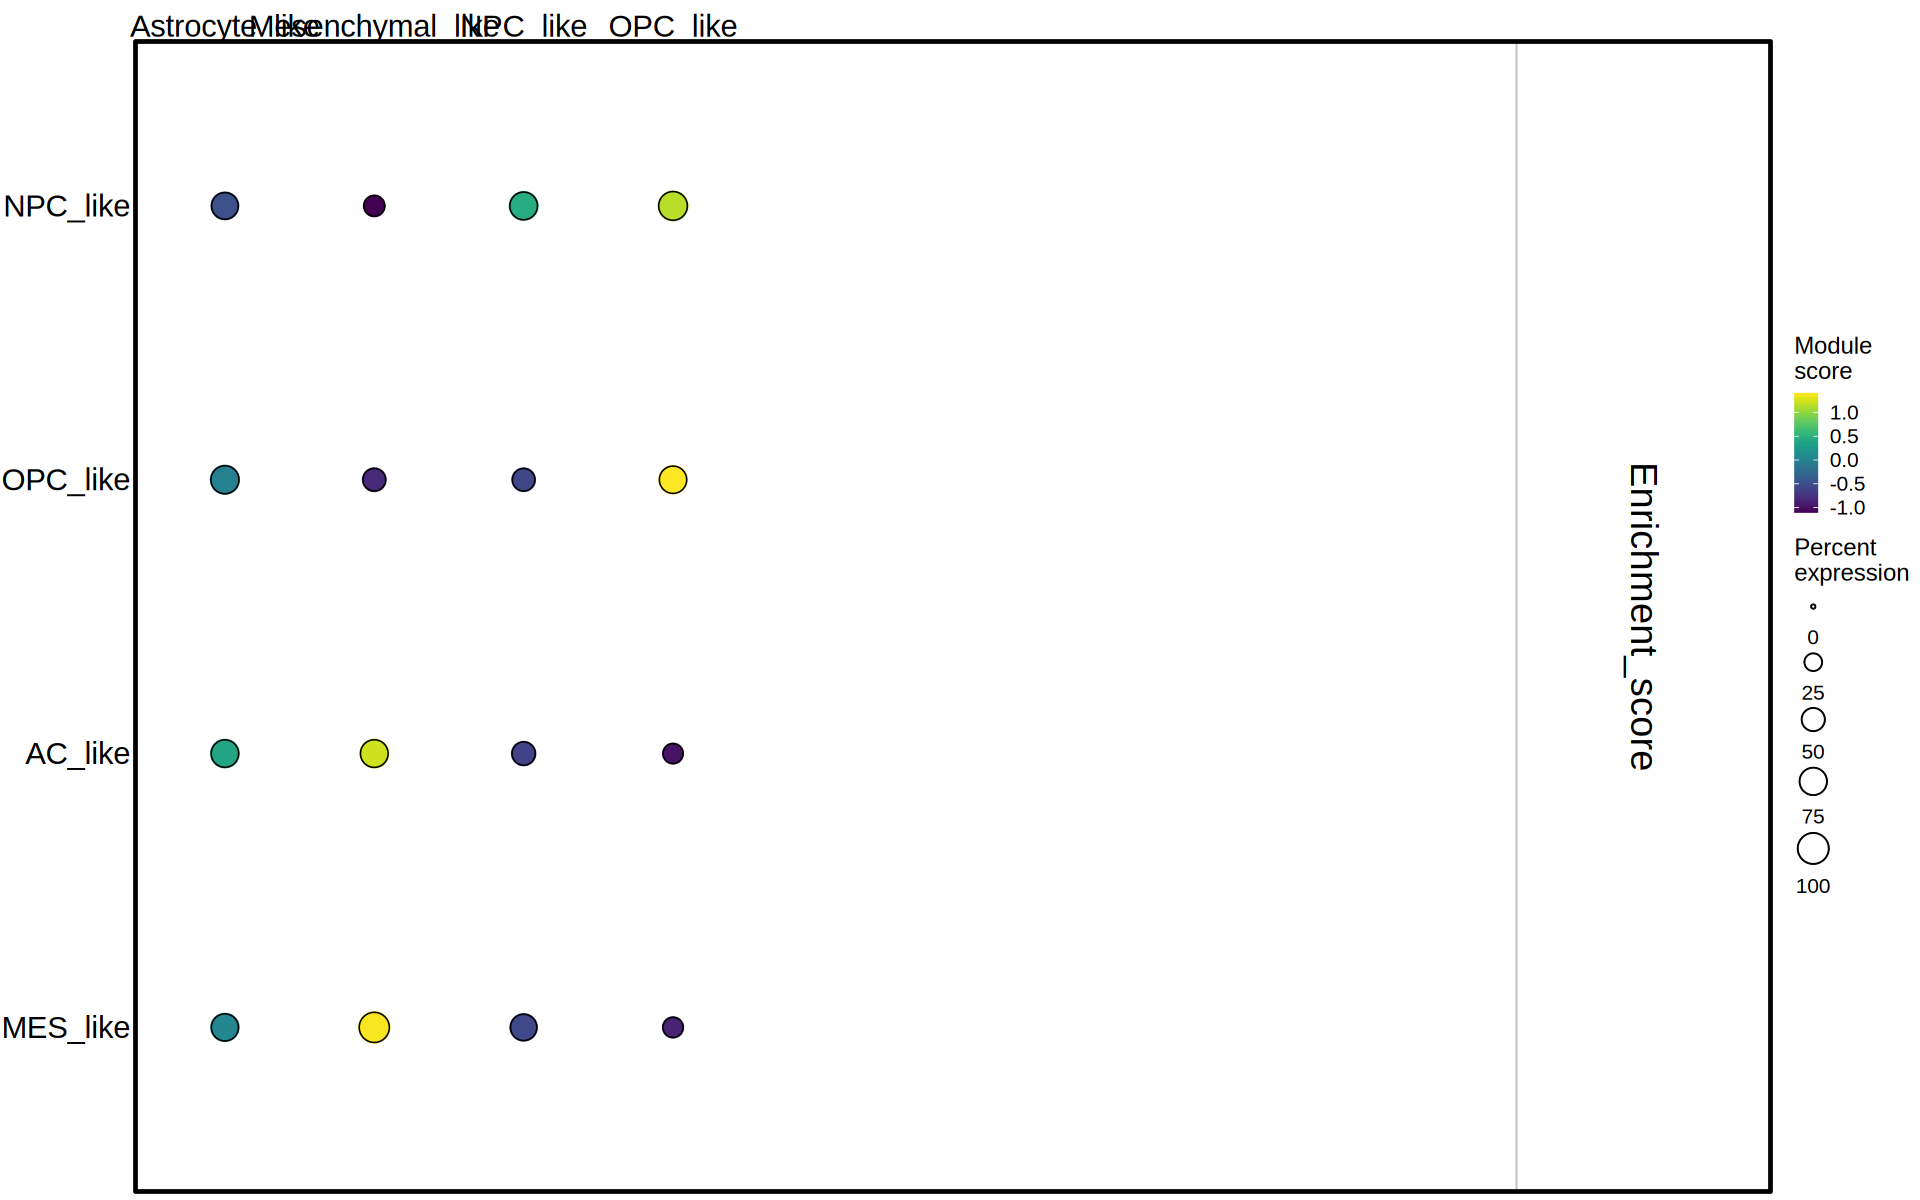

In [120]:
options(repr.plot.width = 16)
plots$Enrichment_score

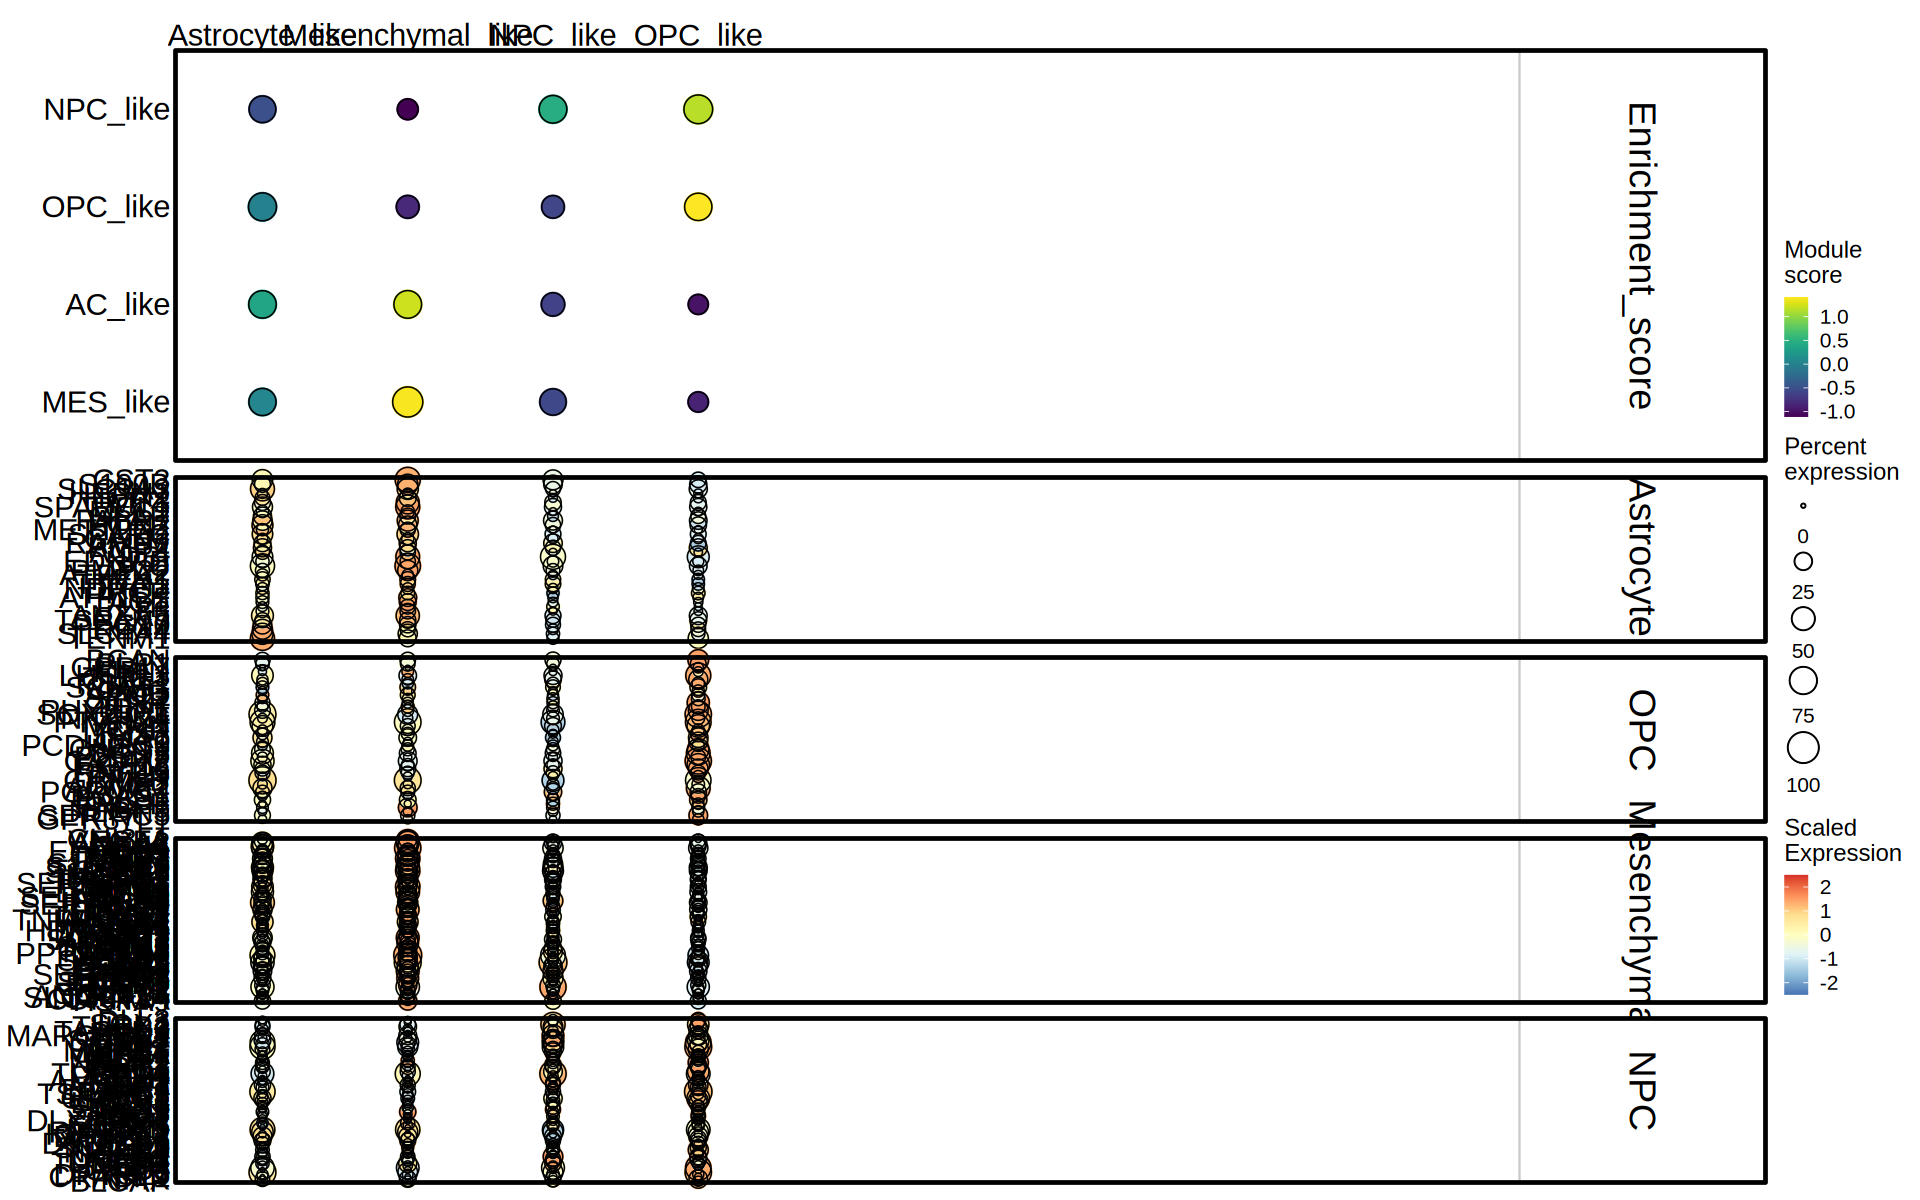

In [114]:
p <- Reduce(`+`, plots) +
  plot_layout(
    guides = "collect",
    design = patch,
    # For 5 modules: first panel 2x as wide, rest normal
    height = c(5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
    #height = unname(unlist(lapply(modulez, length)))/sum(unname(unlist(lapply(modulez, length)))))
p

In [130]:
# 2. DEFINE CUSTOM PLOTTING FUNCTION
# -----------------------------------------------------------------
create_publication_dotplot <- function(seu_obj, 
                                       features, 
                                       group_by, 
                                       scale_data = TRUE,
                                       dot_range = c(0.5, 8)) {
  
  # A. Data Extraction & Pre-calculation
  # We use the internal mechanics of Seurat's DotPlot to handle the 
  # complex calculation of "Percent Expressed" and "Average Scaled Expression".
  # This saves us from writing the math manually but allows us to hijack the data.
  
  message("Calculating expression statistics...")
  
  # Generate the base data using Seurat defaults
  # We suppress warnings because we are only interested in the $data object
  base_plot <- suppressWarnings(
    DotPlot(
      seu_obj, 
      features = features, 
      group.by = group_by,
      scale = scale_data
    )
  )
  
  # Extract the tidy data frame
  plot_data <- base_plot$data
  
  # B. Constructing the ggplot from Scratch
  # We build the plot manually to enforce shape=21 (Fill + Stroke)
  
  p <- ggplot(plot_data, aes(x = features.plot, y = id)) +
    
    # GEOMETRY LAYER (The Critical Step)
    # shape = 21 allows separate 'fill' (expression) and 'color' (border)
    geom_point(
      aes(
        fill = avg.exp.scaled,  # Map enrichment score to FILL
        size = pct.exp          # Map percent expression to SIZE
      ),
      shape = 21,               # Filled circle
      color = "black",          # Fixed border color
      stroke = 0.5              # Thin, precise border
    ) +
    
    # COORDINATE SYSTEM
    # Flips the axes: Clusters on Y, Features on X
    coord_flip() +
    
    # SCALES: COLOR (FILL)
    # Using Viridis as requested for accessibility
    scale_fill_viridis_c(
      option = "viridis", 
      direction = 1,
      name = "Enrichment\nScore"
    ) +
    
    # SCALES: SIZE
    # Enforce the specific range to prevent tiny dots from disappearing
    # or large dots from overlapping too much
    scale_size(
      range = dot_range, 
      limits = c(0, 100),
      name = "Percent\nExpression"
    ) +
    
    # AXIS TITLES & LABELS
    labs(
      x = NULL,
      y = NULL # Usually redundant to label "Cell Types" if the names are clear
    ) +
    
    # LEGEND FORMATTING
    guides(
      # Color bar for enrichment
      fill = guide_colorbar(
        title.position = "top", 
        title.hjust = 0.5,
        barwidth = unit(1, "cm"),
        barheight = unit(5, "cm"),
        frame.colour = "black", 
        ticks.colour = "black"
      ),
      # Size legend for percentage
      size = guide_legend(
        title.position = "top",
        title.hjust = 0.5,
        # Ensure the legend dots look exactly like the plot dots (Shape 21)
        override.aes = list(
          shape = 21, 
          fill = "white", 
          color = "black", 
          stroke = 0.5
        )
      )
    ) +
    
    # THEME & AESTHETICS
    theme_classic() + # Start with a clean base
    theme(
      # Panel and Background
      panel.background = element_rect(fill = "white", color = NA),
      plot.background = element_rect(fill = "white", color = NA),
      
      # Panel Border (Black box around the dots)
      panel.border = element_rect(color = "black", fill = NA, size = 1),
      
      # Remove standard axis lines (the border handles this)
      axis.line = element_blank(),
      
      # Grid lines (Optional: Remove for cleaner look, or keep light grey)
      panel.grid.major = element_line(color = "grey95", size = 0.2),
      panel.grid.minor = element_blank(),
      
      # Axis Text Typography
      # Y-Axis (Cell Types): Large and legible
      axis.text.y = element_text(size = 18, color = "black", face = "plain"),
      # X-Axis (Signatures): Centered and readable
      axis.text.x = element_text(size = 18, color = "black", angle = 0, hjust = 0.5),
      
      # Axis Titles
      axis.title.x = element_blank(), # Often cleaner without x-axis title in DotPlots
      
      # Margins (Top, Right, Bottom, Left)
      plot.margin = margin(t = 10, r = 10, b = 10, l = 10, unit = "pt"),
      
      # Legend Positioning
      legend.position = "right",
      legend.justification = "top",
      legend.box = "vertical",
      legend.margin = margin(l = 10)
    ) +
    
    # Move Y-axis labels to the right side as requested
    scale_y_discrete(position = "right")
  
  return(p)
}

Generating plot...

Calculating expression statistics...



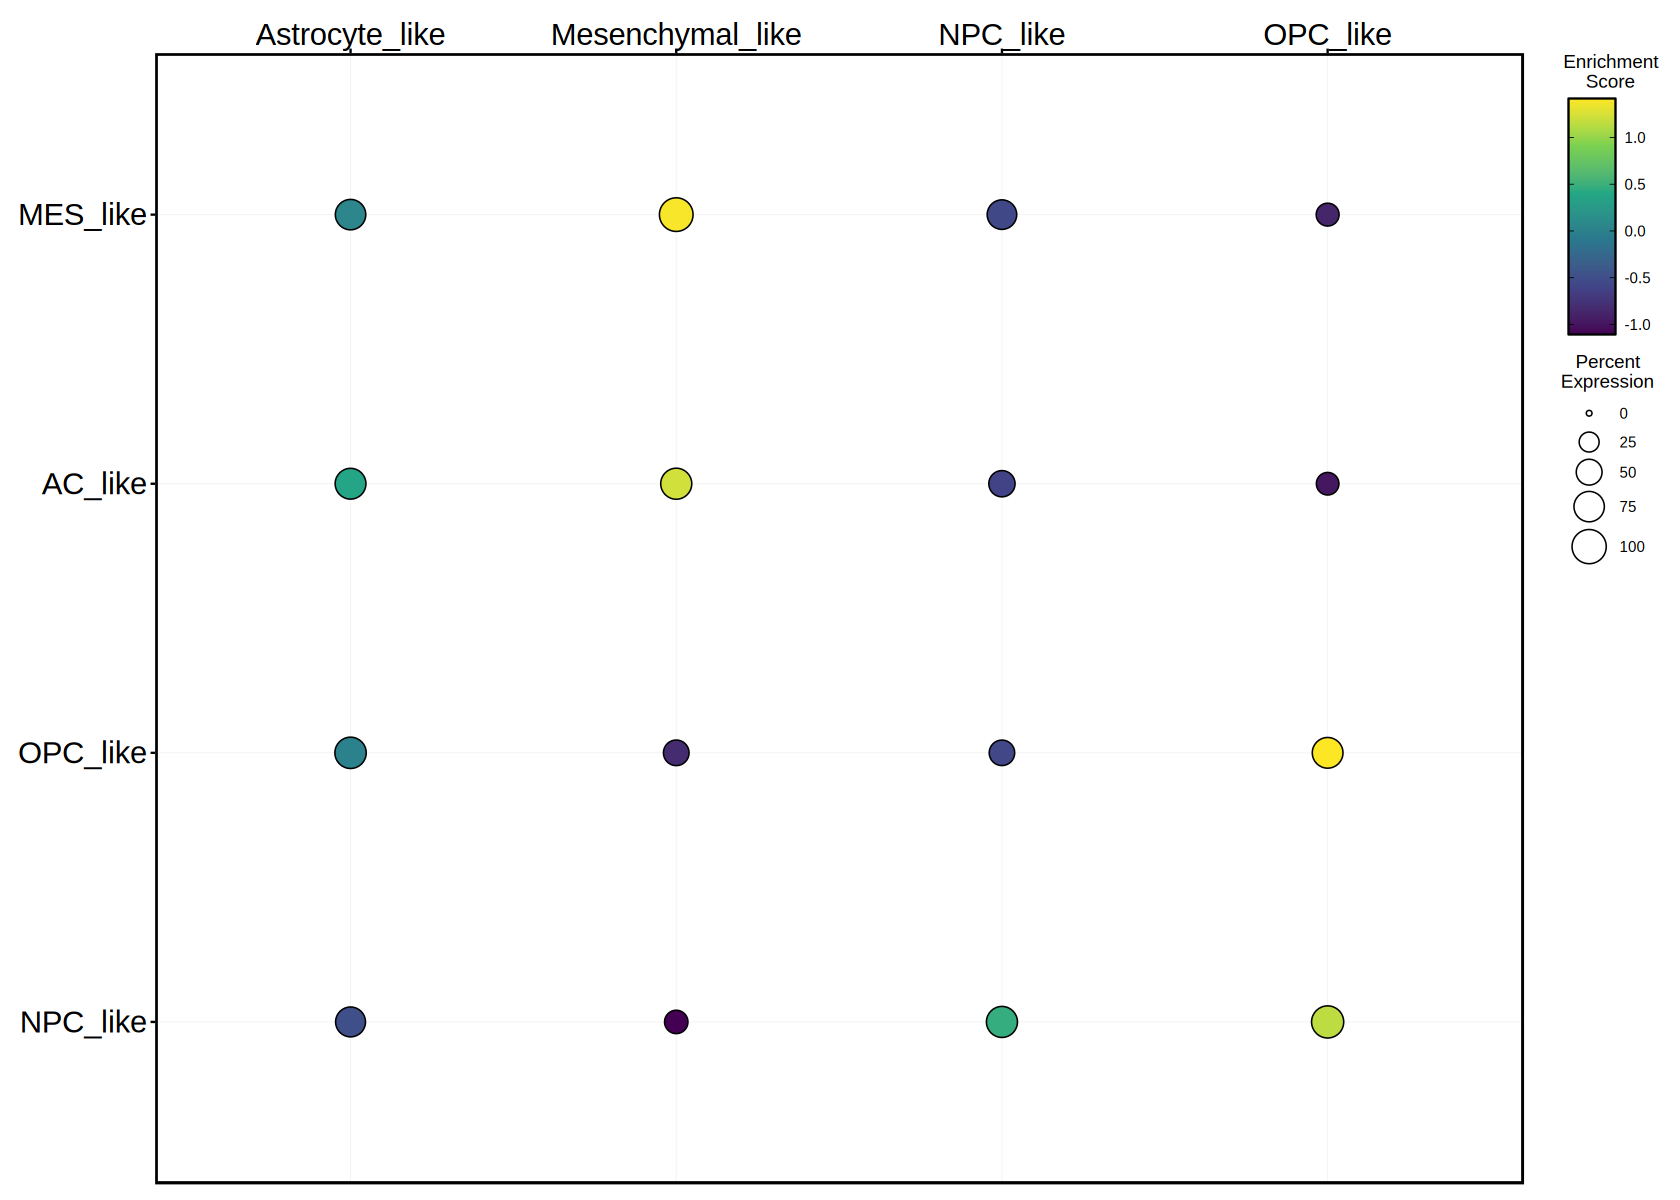

In [131]:
message("Generating plot...")

final_dotplot <- create_publication_dotplot(
  seu_obj = obj_tumor,
  features = new_names,        # Your vector of metadata column names
  group_by = "general_cell_type",
  scale_data = TRUE,           # Scale Z-scores for better relative comparison
  dot_range = c(1, 9)          # Slight tweak to range for visibility
)
final_dotplot